In [2]:
# lets import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255 # reshapes data to 28x28x1.. dont want my computer to explodeee!
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255 # reshapes data to 28x28x1.. dont want my computer to explodeee!

train_labels = to_categorical(train_labels) # Saves labels
test_labels = to_categorical(test_labels)# Saves labels

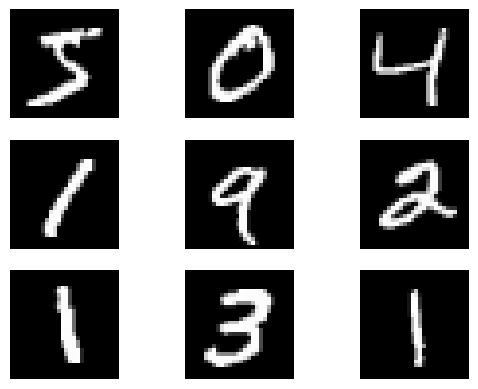

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # tunr off axis
    plt.axis('off')
plt.show()

In [5]:
# now those are very low quality images.. daam prob taken with a nokia 3310... But they are good enough for our model

# Now lets build our model
model = models.Sequential()
model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 80)        36080     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 80)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 80)          57680     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 80)          0

In [6]:
# now lets compile our model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Training time!@@@!!!
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 9s 6ms/step - loss: 0.2413 - accuracy: 0.9268 - val_loss: 0.0744 - val_accuracy: 0.9784
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0749 - accuracy: 0.9773 - val_loss: 0.0743 - val_accuracy: 0.9774
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0605 - val_accuracy: 0.9807
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0662 - val_accuracy: 0.9801
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0623 - val_accuracy: 0.9827


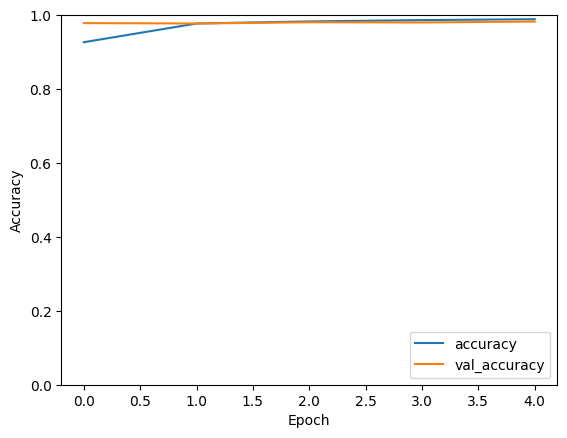

In [8]:
# now lets plot the accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [9]:
# OK so that means that there is not much overfitting.. which is good!!

In [10]:
# now lets try using The CIFAR-10 dataset, Which was the data set that was in the session before this, but i found out the problem with the code and fixed it

In [11]:
# lets import the necessary libraries and dataset the proper way!
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [12]:
# now lets preprocess the data
train_images = train_images.reshape((50000, 32, 32, 3)).astype('float32') / 255 # reshapes data to 32x32x3.. dont want my computer to explodeee!
test_images = test_images.reshape((10000, 32, 32, 3)).astype('float32') / 255 # reshapes data to 32x32x3.. dont want my computer to explodeee!

train_labels = to_categorical(train_labels) # Saves labels
test_labels = to_categorical(test_labels)# Saves labels

In [20]:
# now lets build our model
model = models.Sequential()
model.add(layers.Conv2D(50, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(60, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(68, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(70, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 31, 31, 50)        650       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 31, 31, 50)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 30, 60)        12060     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 60)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 68)        36788     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 28, 28, 68)       

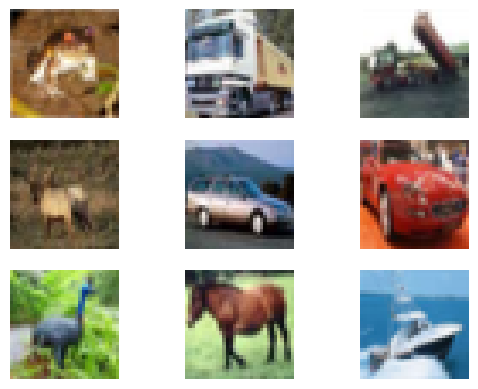

In [21]:
# lets look at some of the images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i].reshape(32, 32, 3), cmap=plt.get_cmap('gray'))
    # tunr off axis
    plt.axis('off')

In [22]:
# now lets compile our model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# lets train our model!
history = model.fit(train_images, train_labels, epochs=7, batch_size=100, validation_data=(test_images, test_labels))

Epoch 1/7
500/500 [==============================] - 13s 26ms/step - loss: 0.1400 - accuracy: 0.9515 - val_loss: 2.2249 - val_accuracy: 0.6536
Epoch 2/7
500/500 [==============================] - 13s 25ms/step - loss: 0.0879 - accuracy: 0.9704 - val_loss: 2.2982 - val_accuracy: 0.6574
Epoch 3/7
500/500 [==============================] - 13s 25ms/step - loss: 0.0570 - accuracy: 0.9808 - val_loss: 2.4449 - val_accuracy: 0.6556
Epoch 4/7
500/500 [==============================] - 13s 25ms/step - loss: 0.0618 - accuracy: 0.9792 - val_loss: 2.4433 - val_accuracy: 0.6546
Epoch 5/7
500/500 [==============================] - 13s 25ms/step - loss: 0.0584 - accuracy: 0.9806 - val_loss: 2.5462 - val_accuracy: 0.6517
Epoch 6/7
500/500 [==============================] - 12s 24ms/step - loss: 0.0520 - accuracy: 0.9825 - val_loss: 2.6183 - val_accuracy: 0.6662
Epoch 7/7
500/500 [==============================] - 12s 25ms/step - loss: 0.0385 - accuracy: 0.9868 - val_loss: 2.9259 - val_accuracy: 0.6563

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 2s - loss: 2.8084 - accuracy: 0.6656 - 2s/epoch - 5ms/step
Test accuracy: 0.6656000018119812
